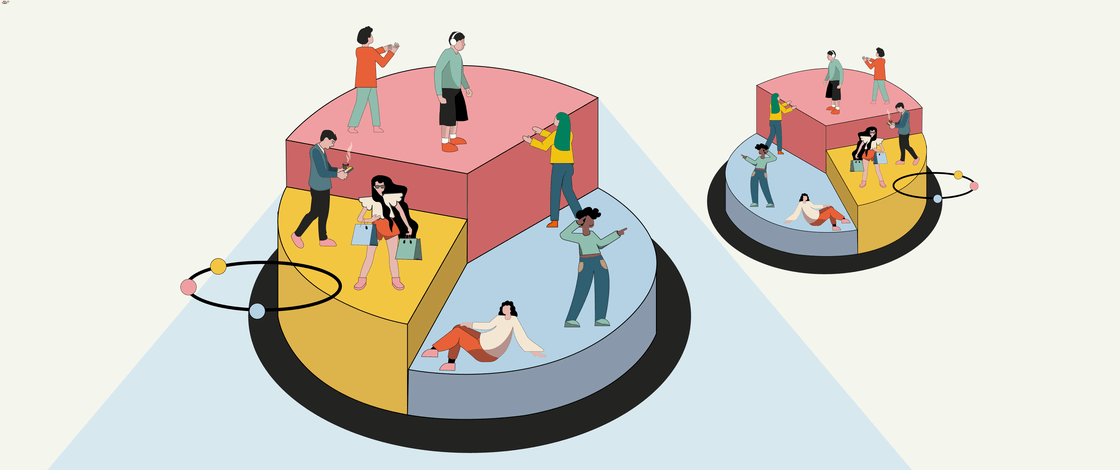

In [1]:
from IPython.display import Image
Image(filename='image.png')

# SegmentSavvy

**Revolutionizing the Shopping Experience for Bicycle Enthusiasts**

Dionne Taylor, Adam Harris, Edward Michaud, Caroline Miller

O'Neil Cohort - Data Science

June 16, 2023

**Project Goal:**  The endstate for this project includes three components:  1) Clustering Model which identifies like-minded customers based off of their purchasing power, historical item purchases, and customer age, 2) Classification Model which can identify the cluster in which a customer's transaction can be segmented, and 3) Recommender System which can link the cluster of a customer with a Amazon product which fits the customer's potential interests and budget. The project acts as proof of concept which can be summarized as using consumer sales data for particular categories of goods, in this case cycling equipment, from smaller businesses to feed marketing decisions for a global, ecommerce company like Amazon which sells a vast scope of products. 

**Project Description:** The project combines two overarching concepts and technologies:  1) customer segementation and 2) product recommendation. The first concept uses a dataset from a small cycling retailor which serves online customers from the United States, the United Kingdom, France, and Germany. The cycling shop sells primarily bikes, accessories, and clothing. Clustering is used to compile similar transactions based on purchasing power (amount spent), category of item purchased, and customer age. These clusters of transactions serve to illustrate distinct customer types. Classification machine learning is then used to cluster transactions based on demographic data as well as transactional data. The second concept uses a dataset which acts as an inventory list for cyling products which Amazon offers. Natural Language Processing techniques to further categorize the cycling product list to fit the clusters of customer types. The customer types from clustering coalesce with the sub-categories of Amazon cycling products in a recommender system which matches appropriate Amazon products to customers based on their interests, past purchases, and inferred budget. 

**Project Purpose:** Online consumers use Amazon to buy affordable, convenient products of a wide variety. Amazon makes online shopping easy and expedient. A wide variety of products can prove to be overwhelming for consumers especially if the consumer is looking for a specific product. There are multiple sports, hobbies, and jobs that require specialized expertise and personizalization when choosing products. Some of these activities include mountain climbing, cycling, backpacking, fishing, and equestrianism. People who engage in these kinds of activities are highly skilled and particular about the brands and products they use. The question this project aims to answer is can an online retailor with an immense assortment of products create a boutique style of personalized product recommendations to customers whose purchases revolve around niche and exclusive themes such as cycling? With artificial intelligence and machine learning, personalized customer segementation can be used to tailor online commerse to accomplish this goal. 

### Data Dictionary

**Dataset 1: Bicycle Sales Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. date | date of transaction (datetime) |
| 2. year | year of transaction (object) |
| 3. month | month of transaction (integer) |
| 4. customer_age |  age of the customer at the time of purchase (Float) |
| 5. customer_gender | gender of customer (female/male) |
| 6. country | country of origin of customer (object) |
| 7. state | state or province of customer (Float)  |
| 8. product_category | broad category of item purchased (object)   |
| 9. sub_category | descriptive category of item purchased(object)   |
| 10. quantity | the number of products purchased for the transaction (Float)  |
| 11. unit_cost | price which the store paid per item purhased in transaction (Float)  |
| 12. unit_price | price which the customer paid per item purchased in transaction (float)   |
| 13. cost | total prie the store paid for the quantity of item purchased in transaction(float)   |
| 14. revenue | total revenue accrued for the quantity  of items purchaseed in transaction (Float)  |

**Clustered Data Dictionary**

| Sub Category        | Encoded |
|:---------------------|---------|
| Bike Racks          | 0       |
| Bike Stands         | 1       |
| Bottles and Cages   | 2       |
| Caps                | 3       |
| Cleaners            | 4       |
| Fenders             | 5       |
| Gloves              | 6       |
| Helmets             | 7       |
| Hydration Packs     | 8       |
| Jerseys             | 9       |
| Mountain Bikes      | 10      |
| Road Bikes          | 11      |
| Shorts              | 12      |
| Socks               | 13      |
| Tires and Tubes     | 14      |
| Touring Bikes       | 15      |
| Vests               | 16      |

**Dataset 2: Amazon Cycling Product Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. | name	The name of the product |
| 2. | main_category	The main category of the product belong |
| 3. | sub_category	The main category of the product belong |
| 4. | image	The image of the product look like |
| 5. | link	The amazon website reference link of the product |
| 6. | ratings	The ratings given by amazon customers of the product |
| 7. | no of ratings	The number of ratings given to this product in amazon shopping |
| 8. | discount_price	The discount prices of the product |
| 9. | actual_price	The actual MRP of the product |

### Imports

In [2]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import modeling_classification as m
import explore as e
import product_recommend as p
import wrangle_products as wp
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the Seaborn style to “darkgrid” for better visual contrast and readability
sns.set_style("darkgrid")
# Set the Matplotlib style to “dark_background” for a visually appealing dark theme
plt.style.use("dark_background") 

## Acquire


- The Bicycle Shop Sales Dataset was acquired from data.world


    - The wrangle.py file located in the project repository contains an aqcuire function which can be used. The function will either save a local copy of the dataset as a csv file to your local directory or it will read the file from the link into a pandas dataframe. 

    - The dataset was uploaded by the author six years ago, 2018

    - This project acquired the data in 2023

    - The dataset in its unclean form contains 34,867 rows (transactions) and 15 columns
    

- The Amazon Cycling Product Data was acquired from Kaggle.com


    - The dataset was loaded onto Kaggle.com in 2023
    
    - The dataset was scraped from Amazon.com (License: https://creativecommons.org/licenses/by-nc/4.0/)
    
    - The dataset in its unclean form contains 1,152 rows each representing one item in Amazon's cycling inventory and 9 columns

In [4]:
# calling the acquire_data() function from the wrangle.py module which loads the bicycle shop dataset

bike_df = w.acquire_data()

Opening data from local file.


In [5]:
bike_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [6]:
# calling the acquire_amazon() function from the wrangle_products.py module which loads the bicycle shop dataset

amazon_df = wp.acquire_amazon()

Opening local amazon_cycling.csv file


In [7]:
amazon_df.head(3)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,QUXIS Portable High Pressure Foot Air Pump Hea...,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/QUXIS-Portable-Activated...,4.0,"7,635",₹499,"₹1,299"
1,Boldfit Gym Shaker for Protein Shake Leakproof...,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Boldfit-Typhoon-Shaker-L...,4.1,"8,052",NaN,₹229
2,Techista 2-in-1 Rechargeable - Cycle Light (3 ...,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Techista-2-1-Rechargeabl...,4.1,"2,214",₹339,₹999


## Prepare

#### The Bicycle Shop Sales Dataset 

When called, the wrangle_data() function from the wrangle.py module actions the following steps:

    - Takes in the dataframe from acquire_data()
    - Lowercased the column names
    - replaces spaces with underscores in the column names
    - The datatype of column 'year' changed to int 
    - The datatype of column 'customer_age' changed to int
    - The datatype of column 'quantity' changed to int
    - The numeric values in columns 'unit_cost', 'unit_price', 'cost', and 'revenue' rounded to represent monetary value
    - The categorical columns 'sub_category', 'customer_gender', and 'country' one_hot_encoded
    - The categorical column 'product_category' label encoded 
    - Dataframe split into train, validate, and test dataset to prevent overfitting and prepare train for exploration
    
**Note:**  Null values were dropped from the dataframe. There was onw row with null values. This may have been input error and therefore the transaction record was removed.

#### The  Amazon Cycling Product Data

When called, the prepare_amazon(df,extra_words=None, exclude_words=None) function is called from the wrangle_products modeule. The function takes the following steps to preprocess the data:

    - lower()
    - unicodedata.normalize to remove any inconsistencies in unicode character encoding
    - .encode to convert the resulting string to the ASCII character set
    - .decode to turn the resulting bytes object back into a string
    - regular expressions capture groups to isolate words and numbers
    - tokenize to break words and any punctuation left over into discrete units
    - lemmatize to keep only the root words
    - remove stopwords as listed in the english dictionary (according to nltk.corpus)
    - replace some nonsense values in the ratings columns with 0s and remove Indian rupee symbol
    - corrects dtypes
    - converts Indian currency to USD
    - feature engineering to create a new column containing the discounted price and a column containing the product rating (overall rating multiplied by number of ratings)

After cleaning the bicycle shop data, the second aspect of data preparation is to model clusters and add them as a column in the dataframe as the target variable. 

In [8]:
# Taking the claned dataframe from wrangle_data(), the function k_means_clustering(k) is called with k
# being the specified number of clusters. The returned dataframe includes the clusters column

# Taking the dataframe from the above function, the function clean_split_df(df) is called to split the data 
# into train, validate, and test, and removing the one_hot_encoded columns

df, train, validate, test = w.clean_split_df(w.k_means_clustering(k=4))

Opening data from local file.


In [9]:
train.shape, validate.shape, test.shape

((19524, 17), (8368, 17), (6974, 17))

## Exploratory Data Analysis

**NOTE:** The following section explores the bicycle shop train dataset only. The Amazon cycling dataset is not included.

### Initial Questions 


    1: On average, is the revenue of each of the customer segments different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?

    2: Does the average age of the customers among the clusters differ? If there is a difference of mean age, in which cluster are the age groups located?

    3: Is there a relationship between age and/or gender and sub category purchased?

    4: Is there a relationship between gender and sub category purchased?

    5: Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?

    6: Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?

    7: Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by location?

    8: Is the proportion of transactions higher in one country relative to national population?



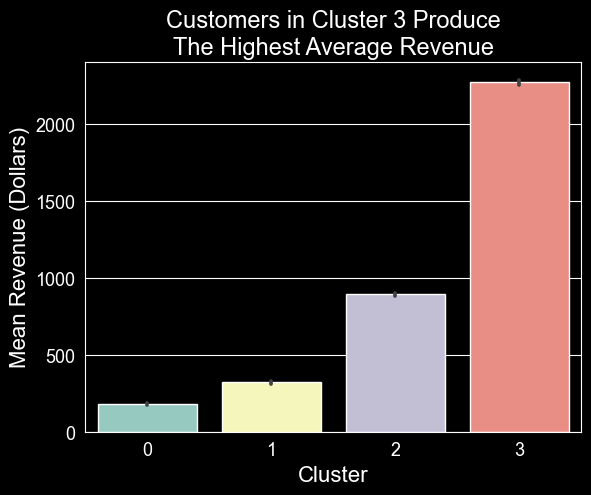

In [10]:
e.show_plot_1(train)

**Question 1:** On average, is the revenue of each of the customer segments different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?

    Revenue is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean revenue value differs among the clusters

- H$_0$ - There is no difference in mean revenue amongst each customer cluster
- H$_a$ - The mean revenue value is different for each customer cluster

In [11]:
e.get_test_1(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33539.63583859


The ANOVA test suggests that there is a difference in the mean value of revenue among each cluster.

**What is each segment paying on average?**

In [12]:
e.get_avg_cluster_revenue(train)

cluster 0 average revenue is: 179.45
cluster 1 average revenue is: 321.25
cluster 2 average revenue is: 894.45
cluster 3 average revenue is: 2274.29


**Which segment pays the most / least?**

Cluster 3 pays the most, with an avg revenue of \$ 2276.82

Cluster 0 pays the least, with an avg revenue of \$ 179.51

**Question 2:**  Does the average age of the customers among the clusters differ?

- H$_0$ - The mean value of age is the same amongst each customer cluster
- H$_a$ - The mean value of age is different amongst different customer clusters

    Age is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean age value differs among the clusters

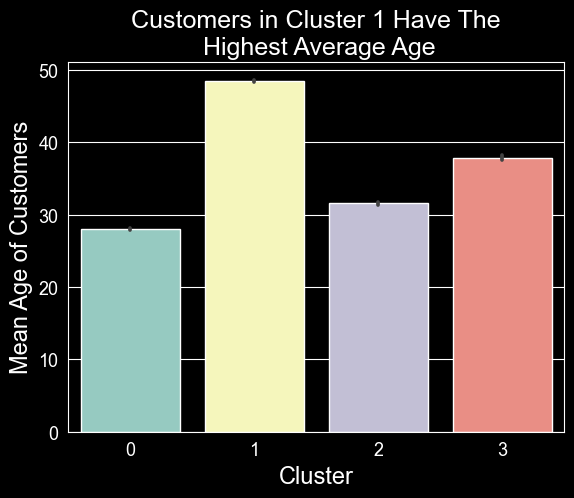

In [13]:
e.show_plot_2(train)

In [14]:
e.get_test_2(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9925.11354908


Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

The ANOVA test suggests that there is a difference in the mean value of customer_age among the different clusters

**If there is a difference of mean age, in which cluster are the age groups located?**

In [15]:
e.get_avg_cluster_age(train)

cluster 0 average customer_age is: 28.1
cluster 1 average customer_age is: 48.5
cluster 2 average customer_age is: 31.6
cluster 3 average customer_age is: 37.9


Cluster 0 is the youngest, with a mean age of 28.1. 

Cluster 1 is the oldest, with a mean age of 48.5 

**Question 3:**  Is there a relationship between age and/or gender and sub category purchased?

Looking at age and sub category first.

- H$_0$ - There is no relationship between age and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between age and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test

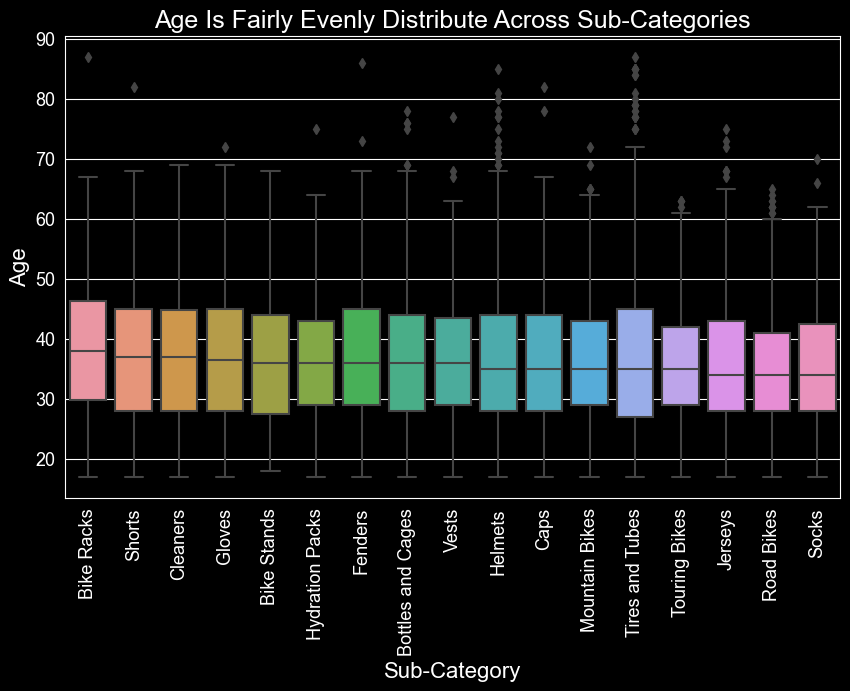

In [16]:
e.show_plot_3(train)

In [17]:
e.get_test_3(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.01044170
test stat value: 31.85551356


The statistcal test suggests that there is correlation between age and sub-category purchased.

**Question 4:** Is there a relationship between gender and sub category purchased?

- H$_0$ - There is no relationship between gender and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between gender and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test

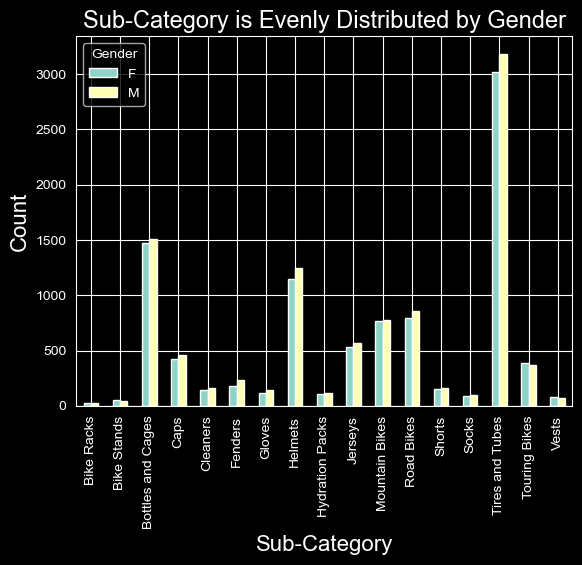

In [18]:
e.show_plot_4(train)

In [19]:
e.get_test_4(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.58319328


Based on our chi-squared statistical test, we are unable to reject our null hypothsis. Therefore we do not have enough evidence to say that the sub_category purchased is dependent upon the customer's gender.

**Question 5:**  Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?

 - H$_O$ - The type of bike purchased is independent of age
    
- H$_a$ -  The type of bike purchased is dependent on age of customer

Age is right-skewed continuous, and type of bike purchased is categorical

We will be using an ANOVA test

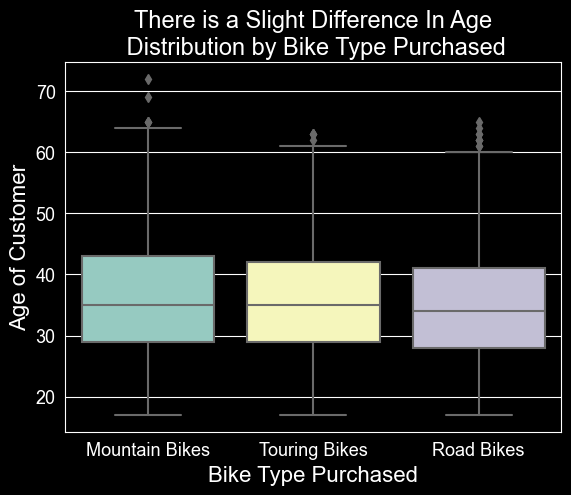

In [20]:
e.show_plot_5(train)

In [21]:
e.get_test_5(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00007305
test stat value: 9.54729572


The ANOVA test suggests that the mean age of customers is different for the three different types of bike, though there is not a large amount of variance between them. 

**Question 6:** Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?

- H$_O$ - The type of bike purchased is independent of gender
- H$_A$ - The type of bike purchased is dependent on gender

Gender is categorical, and type of bike purchased is categorical

We will be using a chi-squared test

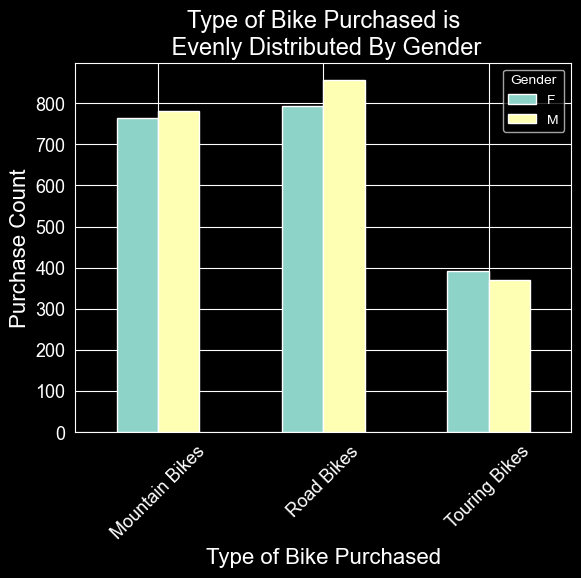

In [22]:
e.show_plot_6(train)

In [23]:
e.get_test_6(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.30317487


The chi-squared test shows we are unable to reject our null hypothesis. Therefore there is not enough evidence to show that the type of bike differs among gender.

**Question 7:**  Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by location?

- H$_O$ - The type of bike purchased is independent of location

- H$_A$ - The type of bike purchased is dependent on location

Customer location is categorical, and type of bike purchased is categorical

We will be using a chi-squared test

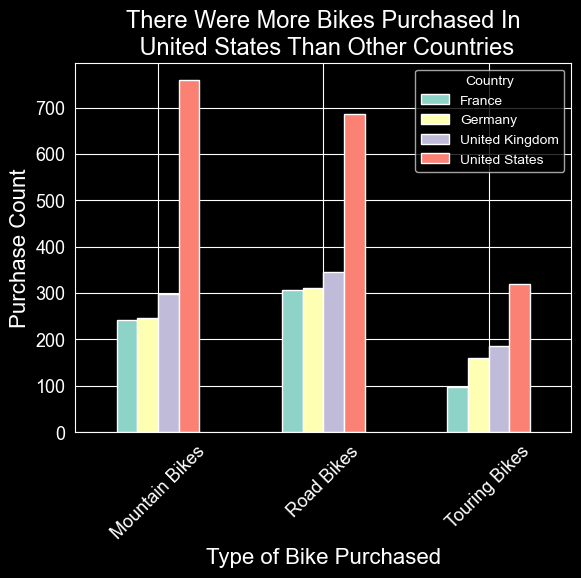

In [24]:
e.show_plot_7(train)

In [25]:
e.get_test_7(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000163
test stat value: 37.17485133


We are able to say that there is enough evidence to suggest that the type of bike purchased is dependent upon the country of purchase.

**Question 8:**   Is the proportion of transactions higher in one country relative to national population?

- H$_O$ - The proportion of customers to national population is the same among each country

- H$_A$ - The proportion of customers to national population differs among each country

Proprotion of customers to population is continuous, and country is categorical

We will be using an ANOVA test

Country total populations as of 2023:

    - United Kingdom 67.62 million
    
    - United States 334.23 million

    - France 65.69 million

    - Germany 83.31 million

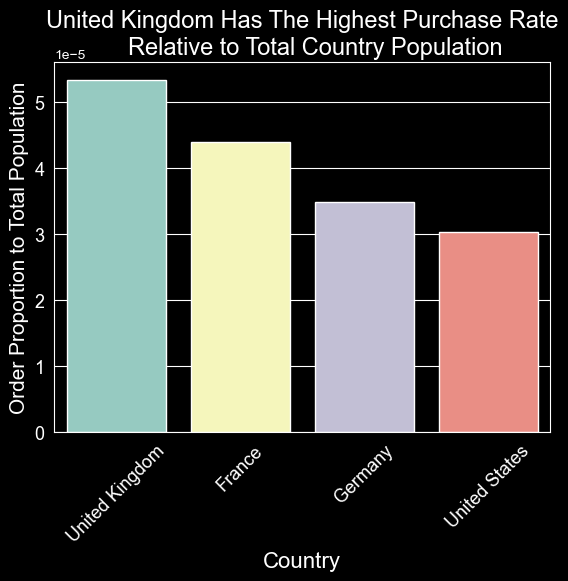

In [26]:
e.show_plot_8(train)

In [27]:
e.get_test_8(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.39162518


There is not enough evidence to reject the null hypothesis, which suggests that the number of orders proportionate to the total country population does not differ between countries in the dataset.

## Exploration Summary

In analyzing age and budget across the four segments of customers, it seems that KMeans has identified distinct groups:

    Group 0:  Low budget and the youngest group (twenties)
    Group 1:  Mid-Low budget and the oldest group (forties)
    Group 2:  Mid-High budget and early thirties (early thirties)
    Group 3:  High budget and late thirties (late thirties)
    
There is sufficient evidence to conclude that age is indictative of product sub-category purchased. 
    
Bike sales make up the majority of the revenue accrued. In examining the sales of the three types of bikes sold in the shop, we can conclude with sufficient evidence that age does correlate with the type of bike purchased.

It is significant to note that while age is indicative of segments, gender continuously proves to be independent of any distinguishable features.

Lastly, while on the surface level it seems that the United States makes up the majority of sales, the sales per country are proportional to each country's population. 

## Modeling

### Introduction


- The modeling process combined two Classification machine learning models. Numerous Decision Tree Classifier and Random Forest CLassifier models were created.


- The columns used in training and evaluating the models included all of the demographic information, the sub-category of product(s) purchased, the overall category of product(s) purchased, the transactional data to include cost, price, and quantity. The continous variables were scaled were using the Standard Scaler, and the discrete variables were one hot-encoded. The target variable is the clusters column representing the customer segmentation.


- The purpose of the classification model is to test the performance of the clusters which KMeans created using the transactional data. **The model is significant** if its performance is excellent because 1) we can confirm the distinction of the clusters of customer segments and 2) the classification model can then be used to place new customers in the most appropriate customer segment based on the transactional data. 


- The baseline used is the most common value of cluster among the four customer segemnts. 


- The evaluation metric used to gauge the best model is the **recall score**. This metric illustrates how well a model can minimize false negatives. This is important to this project because the proper segmentation of a customer is paramount to identifying the customer's purchasing power, their interests, their age which are all indicative of providing accurate product recommendations. Tailored product recommendations give the customer a personalized experience, showing that the retailor is attentive to the customer's needs. The customer may then be more inclined to purchase their goods from the online retailer. A tailored and personalized online interface gives the consumer a boutique experience.

In [28]:
# Reloading k clusters and resplitting scaled/encoded train, validate, test

train, validate, test = w.split_data(w.k_means_clustering(k=4))
X_train, y_train, X_validate, y_validate, X_test, y_test = \
    m.get_modeling_feats_and_target(train, validate, test)

Opening data from local file.


In [29]:
# the find_baseline_and_eval_df function is called from the modeling_classification module

# This function assigns the most common value of the clusters into a new column representing the 
# baseline prediction for each transaction.

# The function then calculates the accuracy, precision, recall, and F1 scores comparing the 
# predictions to the actual clusters

# These values are captured in a dictionary which is then made into the returned dataframe

m.find_baseline_and_eval_df(train)

,Accuracy,Precision,Recall,F1 Score
0,0.349775,0.087444,0.25,0.129568


**Evaluating the Baseline:**  Using recall as the evalaution metric, we can see that if we assigned all customers to the most common cluster of customer segment, the probabilty of making a positive prediction while minimizing false negatives would be around 25% of the time. In the following section, we will create Classification models in an attempt to prove that the transactional data can be used to distinguish between the clusters KMeans identified and that the model performs better than the baseline.

### Creating and Evaluating Machine Learning Classification Models

**Note:**  K Nearest Neighbor models will not be used as the algorithm involved finds clusters in feature space, which is similar to the clustering used in feature engineering the target variables. Logistic Regression modeling will not be used as the algorithm as the target in multi-class.

**Decision Tree Classifier**

In assessing parameters for the best Decision Tree, nine models were generated with the max depths ranging from 1 to 10. The models then were trained on all the transactional data (X_train) and the target (y_train). Each model then predicted a cluster based on the transactional data from the train and valudate datasets. Evaluation metrics were then calculated for accuracy, precision, recall, and F1 score for both the tran predictions and the validate predictions. These scores are returned in a dataframe. 

The evaluation score dataframe is then used as a parameter for a function which finds the best performing model. A column is created which holds the difference in scores from the train set and validate set. The function sorts the delta of change between train recall and validate recall in descending order. From here, the function locates and returns the model which has the highest recall score on the validate dataset.

In [30]:
# Calling the decision tree model function which creates the models and stores
# the scores in a dataframe inside of the function which will find the best performing
# model. The function returns the metrics for this model

m.find_dt_best_model_by_recall_difference(10, X_train, y_train, 
                                          X_validate, y_validate)

(DecisionTreeClassifier(max_depth=10),
 Max Depth            10.000000
 Train_Accuracy        0.997388
 Train_Precision       0.997281
 Train_Recall          0.997768
 Train_F1_Score        0.997522
 Val_Accuracy          0.984106
 Val_Precision         0.983893
 Val_Recall            0.982581
 Val_F1_Score          0.983214
 Recall_Difference     0.015187
 Name: 9, dtype: float64)

**Random Forest Classifier**

In assessing parameters for the best Random Forest, 80 different models were generated with max depths and min samples leaf values ranging from 1 to 9. The models were trained and evaluated in the same manner as the Decision Tree models. The best performing model was identified in the same manner as the Decision Tree model using the difference in recall score between the train and validate datasets then finding the highest recall score for the validate set. 

In [31]:
m.find_rf_best_model_by_recall_difference(X_train, y_train, 
                                          X_validate, y_validate)

(RandomForestClassifier(max_depth=8, min_samples_leaf=7),
 Max Depth            8.000000
 Min Leaf             7.000000
 Train_Accuracy       0.975876
 Train_Precision      0.974418
 Train_Recall         0.976104
 Train_F1 Score       0.975246
 Val_Accuracy         0.971917
 Val_Precision        0.970130
 Val_Recall           0.970222
 Val_F1 Score         0.970168
 Recall_Difference    0.005882
 Name: 69, dtype: float64)

**Takeaways from Model Evaluation:**

While both of the recall scores were significantly higher than that of the baseline, the Decision tree model with a max depth of 10 performed the best. It is extremely important that the scores not only in recall but across the metrics are high and that the difference in scores between the train and validate datasets is low, sitting just over 1.5%. These two aspests indicate that the model is not overfit, and that based on transactional data alone, the model is able to precisely segment transactions. This is indicates that the clusters found by KMeans are in fact distinguishable, able to recreate, and that the training set has enough data to predict on unseen transactions. 

**Testing the Best Model**

In [32]:
m.test_decision_tree(10, X_train, y_train, X_test, y_test)

,Max_Depth,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,10.0,0.997439,0.99734,0.997809,0.997572,0.987238,0.986551,0.987207,0.986872


**Modeling Conclusion:**
    
As seen between the train and validate datasets, the model appears to prove that it is not overfit due to the involatility of the evaluation metrics. 

This model is fit to segment unseen transactions which can then be used with confidence in pairing new and relevant products with specific customer groups.

### Recommender System

The recommender system was built combining multiple methods to include Natural Language Processing (NLP) using the NLTK library, regular expressions, and feature engineering. 

The algorithm created in this project uses unique functions following these steps:

1. The 17 sub-category names used in clustering the customer segments are linked to sub_category specific regular expressions. 

2. These regular expressions are then matched to products within the cleaned Amazon product dataset by finding one of more words in the product name or description and linking the product to the regular expression unique to each sub-category of the bicycle shop.

3. These products are stored in a product list which are then stored in a dictionary depending on the amount of regular expressions (the number of regular expressions associated with a sub-category will dictate the number of lists of products contained in the dictionary.

4. The price of products per cluster is then defined as:

    - Cluster 0:  items below $20
    
    - Cluster 1:  items greater than or equal to $20 and less then $40
    
    - Cluster 2:  items greater than or equal to $40 and less than $100
    
    - Cluster 3:  items greater than or equal to $100
    
    
5. The clusters are linked to the top 5 sub-categories purchased by each cluster

6. The product dictionaries pertaining to the sub-categories are then sifted through for matches based on item price and the item sub-category

7. These products are then assigned to each cluster's transactions

In [33]:
# Calling function from the product_recommend module which 
# returns the sub_categories and the regular expressions 
# to look for in the Amazon product list to link products to
# associated sub_categories

# NOTE: 'bike' and 'bikes' are included in the extra_words parameter

p.get_category_list()

,shop_cat,lemmed_cat,regexp
0,Tires and Tubes,tire tube,.*tire.*|.*tube.*
1,Gloves,glove,.*glove.*
2,Helmets,helmet,.*helmet.*
3,Bike Stands,stand,.*stand.*
4,Mountain Bikes,mountain,.*mountain.*
5,Hydration Packs,hydration pack,.*hydration.*
6,Jerseys,jersey,.*jersey.*
7,Fenders,fender,.*fender.*
8,Cleaners,cleaner,.*cleaner.*
9,Socks,sock,.*sock.*


In [34]:
# When we run the recommender system for cluster 0, the following 
# dataframe is returned

p.get_cluster_product_rec(0).head(3)

Opening local amazon_cycling.csv file


,name,amazon_main_cat,amazon_sub_cat,image,link,ratings,no_of_ratings,discount_price,actual_price,name_preped,discount_amount,prod_rating,cat_matches
0,Fitkit Classic Bottle Shaker 700ml,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Fitkit-Classic-Bottle-Sh...,4.1,18123,2.64,5.39,fitkit classic bottle shaker 700ml,2.75,74304.3,[Bottles and Cages]
2,Boldfit Gym Shaker for Protein Shake Leakproof...,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Boldfit-Typhoon-Shaker-L...,4.1,8052,2.75,2.75,boldfit gym shaker protein shake leakproof sha...,0.00,33013.2,[Bottles and Cages]
5,SignoraWare Charger Stainless Steel Protein Sh...,sports & fitness,Cycling,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Signoraware-Charger-Shak...,4.3,6596,6.53,7.79,signoraware charger stainless steel protein sh...,1.26,28362.8,[Bottles and Cages]


In [35]:
# Creating dataframes for each of cluster recommendations

clus_0_recs = p.get_cluster_product_rec(0)
clus_1_recs = p.get_cluster_product_rec(1)
clus_2_recs = p.get_cluster_product_rec(2)
clus_3_recs = p.get_cluster_product_rec(3)

# Calls the split_series_words function from the explore module to create a series
# that contains all the words used in each cluster's product description

clus_0_words = e.split_series_words(clus_0_recs, 'name')
clus_1_words = e.split_series_words(clus_1_recs, 'name')
clus_2_words = e.split_series_words(clus_2_recs, 'name')
clus_3_words = e.split_series_words(clus_3_recs, 'name')

Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file


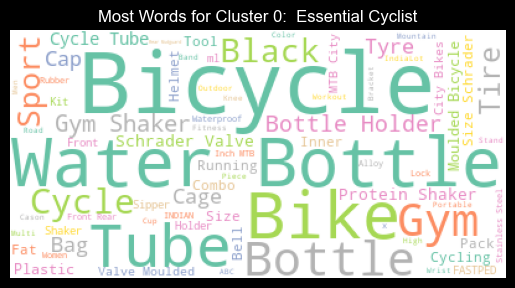

In [36]:
# Visualizing the product words by cluster

# For Cluster 0, we know that the sub-categories most purchased include 
# all three types of bikes, hydration packs, anf fenders

e.product_rec_wordcloud(clus_0_words, cluster_name='Cluster 0:  Essential Cyclist')

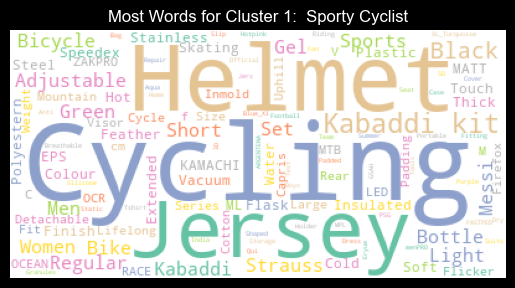

In [37]:
# For Cluster 1, we know that the sub-categories most purchased include
# hydration packs, jerseys, helmets, shorts, and bike stands

e.product_rec_wordcloud(clus_1_words, cluster_name='Cluster 1:  Sporty Cyclist')

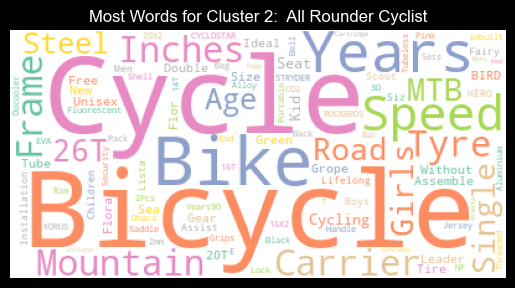

In [38]:
# For Cluster 2, we know that the sub-categories most purchased include
# bike stands, shorts, vests, hydration packs, and bike stands

e.product_rec_wordcloud(clus_2_words, cluster_name='Cluster 2:  All Rounder Cyclist')

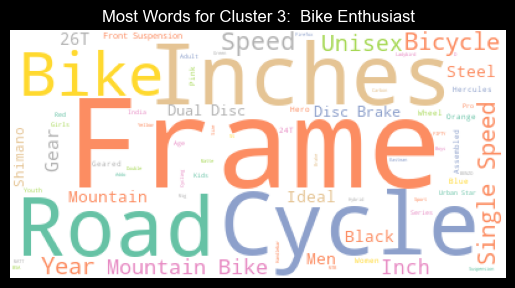

In [39]:
# For Cluster 3, we know that the sub-categories most purchased include
# bike racks and the three typess of bikes

e.product_rec_wordcloud(clus_3_words, cluster_name='Cluster 3:  Bike Enthusiast')

Those customers in cluster 0 historically buy the most items in sub-categories Tires and Tubes, Bottles and Cages, Caps, Helmets, Cleaners, and they usually spend up to $20 per transaction. Items that meet these parameters are returned as a dataframe of appropriate items to recommend to these customers. 

Additionally, the dataframe returns the items in descending order where the highest rated and most frequently purchased items are recommended first.

## Conclusion

### Summary
* From initial **exploration**, we can conclude the following about the data. Certain geographic locations spend more and place more orders. No gender spends more, makes more orders, spends more money, nor buys specific products. Customer age brackets on average spend a distinguishbale amount of money per transaction than the other age brackets. The majority of orders are for accessories and apparel, while the most revenue per product category comes from bicycle sales. When subtracting the revenue (cost to consumer) from cost of production (cost to retailer), the most profitable items are helmets, tires, and tubes.

* After conducting **exploratory data analysis** on the segments of customers, we can conclude the following statements. Essential Cyclists (Cluster 0) make the most transactions and the Bike Enthusiasts (Cluster 3) make the least transactions. Between these two segments, when considering the average price per transaction, the Bike Enthusiasts spend more per order than the Essential Cyclists. There are distinct age brackets among the segments; there is no correlation between average price per transaction and age, but there are also distinct pockets of purchasing power (the amount per transaction) between the segments. There are customer segments who mostly buy items in specific sub-categories, and there are segments which do not buy any items from certain sub-categories. 

* **Classification machine learning** was able to confirm that the clusters of customer segments found are distinct from one another with a recall score of 98.7%. A high recall score indictates that the model is effective in identifying positive instances, meaning the classifier correctly identified the segments initially made by KMeans. This distinction between segments is crutial for the recommender's ability to identify products unique to each segment and each customer.

* As seen in the wordclouds above, the **recommender system** does recommend unique items to each of the segments, and the recommended products are relevent to purchase history when considering sub-categories and price points uninque to each segment. 

### Recommendations
* To maximize orders, we recommend marketing to the Essential Cyclist segment. These customers account for the majority of transactions and they tend to buy items from all sub-categories of products. These customers have the lowest budget, buying the least expensive products though making up the majority of the customer base. These customers are generally between 23 and 33 years of age and spend between $30 and $140 per transaction. The profit on average per transaction is approximately $30.


* To maximize profits, we recommend marketing to the All-Rounder Cycylist segment. These customers spend the most money on the most profitable sub-categories of products which include helmets, tubes, and tires. They buy mid to high-end accessories and apparel. This segment of customers brings in approximately $47 of profit on average per transaction. These customers are generally 38 to 58 years of age, and spend between $39 to $225 per transaction. 


* To maximize revenue, we recommend marketing to the Bike Enthusiast segment. These customers place the least amount of purchases, but they spend more per transaction than the other segments. This segment stands out for the number of bike racks it purchases and for the amount they spend on bike racks. These customers also buys bikes of all three types, and they buy very high-end bikes. This segment on average spends $1,376 per transaction. These customers are generally between 30 and 44 years of age, and spend between $813 and $1,958 per transaction.

### Next Steps

* We would employ the GridSearchCV for more sensitive hyperparameter tuning to find the clusters.


* Research and incorporate deep learning methods and algorithms for more sophisticated customer segmentation and recommendation systems. 


* We would investigate the outliers and try to understand if they represent errors in data entry or if they are viable datapoints.


* We would perform Time Series analysis to gauge the company's growth and how the recommender system could help in continuing to grow the sales of sub-categories which are selling well and to see if we could help improve the sales of the products in sub-categories which are not performing as well.


* Improve the regular expressions to capture more products for the recommender system. Improve upon the recommender system to account for brands purchased by specific segments, gender specific products, and successive products as to not advertise products which are similar to past purchases. 


* Find other datasets pertaining to other markets to expand the scope of the customer segmentation and the recommender system.